In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\pauli\Downloads\red-wine-quality-cortez-et-al-2009\versions\2\winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


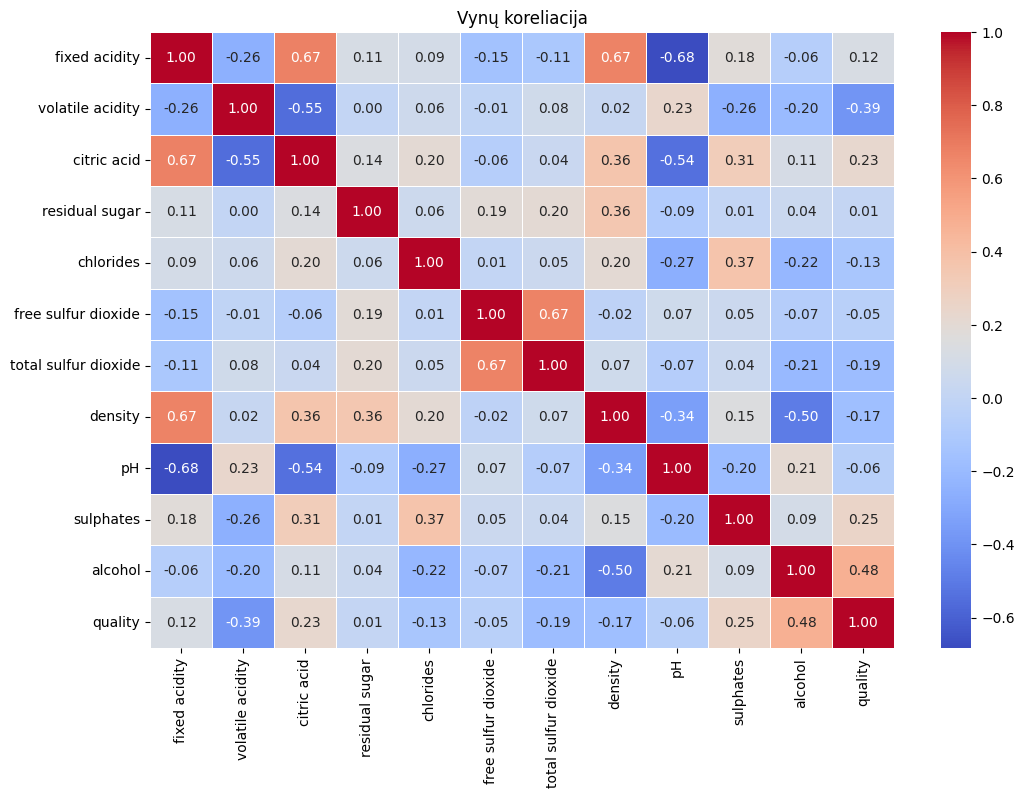

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Vynų koreliacija')
plt.show()

In [13]:
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(X_test_scaled)

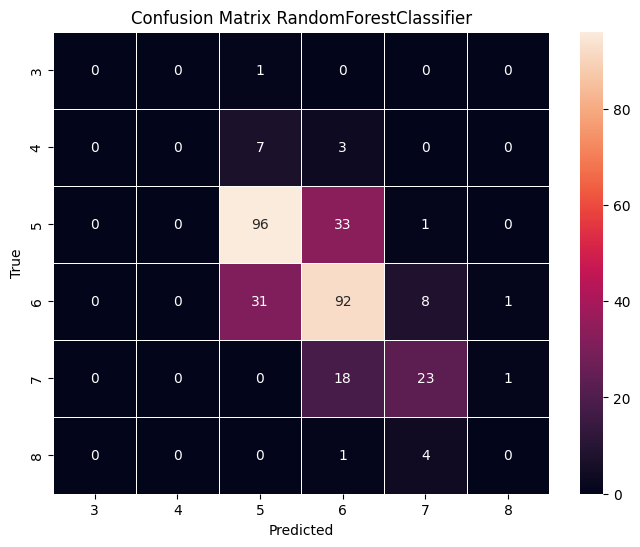

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=np.unique(y), yticklabels=np.unique(y), linewidths=0.5)
plt.title("Confusion Matrix RandomForestClassifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy_score RandomForestClassifier: {accuracy:.2f}")

accuracy_score RandomForestClassifier: 0.66


In [30]:
regressor = DecisionTreeClassifier(random_state=42)

regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(X_test_scaled)


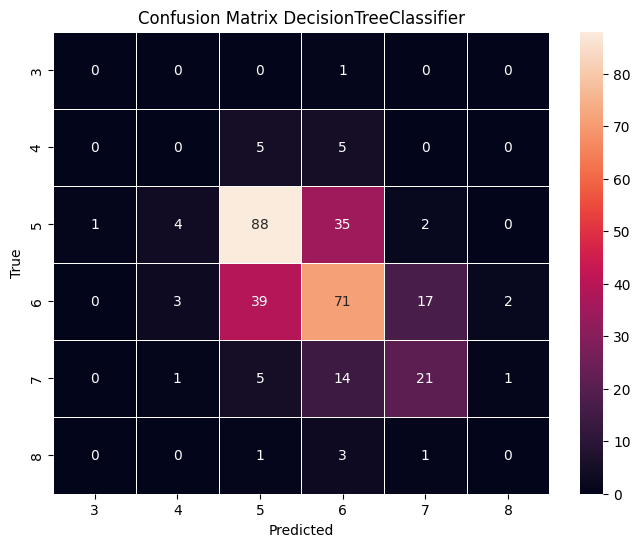

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=np.unique(y), yticklabels=np.unique(y), linewidths=0.5)
plt.title("Confusion Matrix DecisionTreeClassifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [32]:
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy_score DecisionTreeClassifier: {accuracy:.2f}")

accuracy_score DecisionTreeClassifier: 0.56
